### Hi Everyone,

#### This is the report section of the traffic data analysis to get the chances and the severity of the accident given various parameters like weather condition, road condition, light condition etc.

#### In this section I will let you through the dataset, preparation of the data and the final result. 

### Problem Description - To predict the severity of the accidents
Hi Everyone, This is the Business Problem section for the final assignment.

**PROBLEM:** If we are not aware of the weather conditions, road conditions, light conditions, traffic while travellig we can find ourselves in unfortunate situations which we would like to avoid. It is always good to have the above mentioned information and the other factors while traveling through which can predict the chances of getting into accident and the severity of it. The segment who will benefit from this analyis are the prople who have to travel long distance and would like to understand the chances and severity of accident so that they can change plans accordingly 

**SOLUTION:** We can use the past data about the accidents happened given the various scenarios and use it to predict the likelyhood of the accidents on a given date with various conditions. I will analyse the given past data to find the right predictor variable which will predict the target variable in the efficient way and can be used as a model to predict the severity of accidents.



### Infomration on DataSet

**TOTAL VARIABLES:** The initial data has 36 Predictor Variables and one Target Variable which is SEVERITY CODE The dataset contains data on accident which took place, severity (This column is coming twice in the data) of it and the values of various parameters at the time of accident.

The variables are in the format: Variable Name- Description (Type)

1.	SEVERITYCODE - A code that corresponds to the severity of the collision (Text, 100) - Can be one of (1,2)
2.	X - Coordinates(Double)
3.	Y - Coordinates(Double)
4.	OBJECTID - ESRI unique identifier (Int)
5.	INCKEY - A unique key for the incident (Int)
6.	COLDETKEY - Secondary key for the incident (Int)
7.	REPORTNO - Number of the report (Int)
8.	STATUS - One of (Matched, Unmatched) (Text)
9.	ADDRTYPE - Collision address type (Text, 12) - Can be one of (Alley, Block, Intersection)
10.	INTKEY - Key that corresponds to the intersection associated with a collision (Double)
11.	LOCATION - Description of the general location of the collision (Text, 255)
12.	EXCEPTRSNCODE - (Text , 10)
13.	EXCEPTRSNDESC - (Text , 300)
14.	SEVERITYCODE.1 - A code that corresponds to the severity of the collision (Text, 100) - Can be one of (1,2)
15.	SEVERITYDESC - A detailed description of the severity of the collision (Text)
16.	COLLISIONTYPE - Collision type (Text, 300)
17.	PERSONCOUNT - The total number of people involved in the collision (Double
18.	PEDCOUNT - The number of pedestrians involved in the collision. (Double
19.	PEDCYLCOUNT - The number of bicycles involved in the collision. (Double)
20.	VEHCOUNT - The number of vehicles involved in the collision. (Double)
21.	INCDATE - The date of the incident.(Date)
22.	INCDTTM - The date and time of the incident.(Text, 30)
23.	JUNCTIONTYPE - Category of junction at which collision took place (Text, 300)
24.	SDOT_COLCODE  - A code given to the collision by SDOT.(Text,10) 
25.	SDOT_COLDESC - A description of the collision corresponding to the collision code.(Text,300
26.	INATTENTIONIND - Whether or not collision was due to inattention.(Y/N)(Text, 1)
27.	UNDERINFL - Whether or not a driver involved was under the influence of drugs or alcohol. (Text, 10)
28.	WEATHER - A description of the weather conditions during the time of the collision.(Text, 300
29.	ROADCOND - The condition of the road during the collision.(Text, 300)
30.	LIGHTCOND - The light conditions during the collision.(Text, 300)
31.	PEDROWNOTGRNT - Whether or not the pedestrian right of way was not granted. (Y/N) (Text, 1)
32.	SDOTCOLNUM - A number given to the collision by SDOT.(Text, 10
33.	SPEEDING - Whether or not speeding was a factor in the collision. (Y/N) (Text, 1)
34.	ST_COLCODE - A code provided by the state that describes the collision. (Text, 10)
35.	ST_COLDESC - A description that corresponds to the state’s coding designation.(Text 300)
36.	SEGLANEKEY - A key for the lane segment in which the collision occurred.(Long)
37.	CROSSWALKKEY - A key for the crosswalk at which the collision occurred.(Long)
38.	HITPARKEDCAR - Whether or not the collision involved hitting a parked car. (Y/N) (Text, 1)  


### Selection of the relevant Pridictor Variables

#### One of the best way to select the correct predictor variable is by elimination of the non-relevant variables. Below I have described the variables I have removed and the reason for that:

As we can see from the data that some of the columns are not required for the analysis of data. So we try to analyze these columns and will delete them if they are not relevant

 - Remove columsn which are just IDs, Numbers and Keys, so we can remove them - OBJECTID, INCKEY, INTKEY, COLDETKEY, REPORTNO, STATUS, SEGLANEKEY, CROSSWALKKEY
 - Remove columsn which are infomation given - ST_COLCODE, SDOT_COLDESC, SDOT_COLCODE, ST_COLDESC, SDOTCOLNUM
 - Remove column SEVERITYCODE.1 as it is the duplication of the first column SEVERITYCODE
 - Remove column SEVERITYDESC - It is just a detailed description of the severity of the collision
 - Remove columns EXCEPTRSNCODE and EXCEPTRSNDESC as not enough information is given in the columns
 - Other columns to be removed are - PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT as this data changes on a continous basis and we can not predict that at the time of collision how many vehicles or persons will be there
 - Remove column - X, Y, LOCATION as this is most probably differnt for every collision
 - Other columns which are not relevnant where the information available is less than 15% - PEDROWNOTGRNT, SPEEDING, INATTENTIONIND
 - For column - HITPARKEDCAR the count of 'N':'Y' is (187,457:7,216) thus this is very unbalance parameter and should be removed
 
 The remaining columns are -'SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND'
 

### Data Preperation

I will now go through the remaining columns and try to find the best combination from them to predict the values:

 - First I have converted the columns - INCDATE', 'INCDTTM' to date time object. We can see that column INCDATE provide the same information as column INCDTTM thus I have removed this column 
 
**Weather Column** It has 11 unique values \
The format is Values - Percentage of Data 
 
 - Clear -                        0.586180
 - Raining -                    0.174823
 - Overcast -                   0.146177
 - Unknown -                     0.079597
 - Snowing -                     0.004784
 - Other -                        0.004388
 - Fog/Smog/Smoke -              0.003001
 - Sleet/Hail/Freezing Rain -     0.000596
 - Blowing Sand/Dirt -           0.000295
 - Severe Crosswind -            0.000132
 - Partly Cloudy -               0.000026

**Road Condition Column** has 9 Unique values
 
 - Dry -               0.656487 
 - Wet -               0.250310 
 - Unknown -           0.079500 
 - Ice -               0.006375
 - Snow/Slush -        0.005294
 - Other -             0.000696
 - Standing Water -    0.000606
 - Sand/Mud/Dirt -     0.000395
 - Oil -               0.000337

 **Light Condition Column** has 9 Unique Values
 
 - Daylight -                    0.612850
 - Dark - Street Lights On -     0.255970
 - Unknown -                     0.071096
 - Dusk -                        0.031145
 - Dawn -                        0.013203
 - Dark - No Street Lights -     0.008111
 - Dark - Street Lights Off -    0.006327
 - Other -                       0.001240
 - Dark - Unknown Lighting -     0.000058
 

#### If we look at the percentages of data for each unique value given for the above mentioned variables we will find that:

 -  Weather Column: Four values 'Clear', 'Raining','Overcast', 'Unknown' make 99% of total data

 - Road Condition Column: Three values 'Wet', 'Dry','Unknown', make 98.5% of total data  

 - Light Condition Column: Four values 'DayLight', 'Dark','Unknown','Dusk' make 98% of total  data

 
#### We analysed that in the above column that when value of 'WEATHER' is 'Unknown':

 - 90% of times value of 'ROADCOND' is 'Unknown'
 - 70% of times value of 'LIGHTCOND' is 'Unknown'
 
**So we can remove all the rows for which values for 'WEATHER' are 'Unknown' as for most of these cases values in 'ROADCOND' and 'LIGHTCOND' will be 'Unknown'
Also we can get dummy variables for these columns as:**

 - Weather Column: 'Clear', 'Raining','Overcast'
 - Road Condition Column: 'Wet', 'Dry'
 - Light Condition Column: DayLight', 'Dark'

#### For Column 'ADDTYPE' - the values are

 - Block -       98565
 - Intersection -    57020
 - Alley -             501
 
**There will be two dummy variables for 'ADDRTYPE' - 'Block', 'Intersection' and we should remove the rows with value 'Alley'**

#### For Column 'COLLISIONTYPE'

**The data is fairly distributed among the 10 values of column - 'COLLISIONTYPE' - and it is difficult to find the dominant values which can be used for prediction, I have delete this column**

#### Similarly for Column 'JUNCTIONTYPE'

**I have remove the column 'JUNCTIONTYPE' as it is fairly distributed with lot of values and it is giving detailed information of what is given in column 'ADDRTYPE' which will be better predictor variable**

#### From the Column 'INCDTTM'  I have created to new columns - 'Month' and 'Hour' infomration of the time and tried to see how they are affection the severity of Accident

As we can see in the below graph - Column 'Month' is almost equally distributed and there is no dominant month, I have removed column 'Month




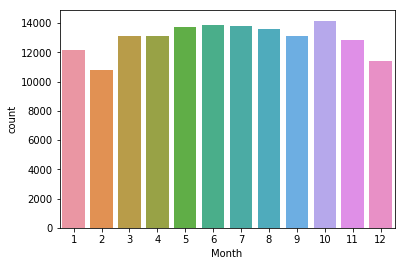

#### For Column 'Hour' I can see in the below plot that certain hours are more prone to accidents thus I have divided this column  in three equal parts of 8 hours each and have used these two new  columns  -'Hour 0 - 7', 'Hour 16 - 23', as predictor variable. 

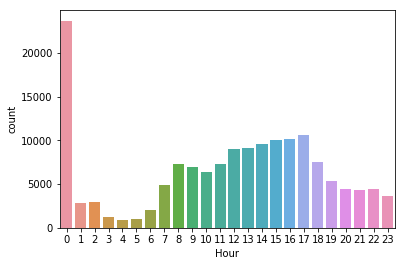

### One Hot Encoding

**I have convert the categorical values in numeric value by using ONE HOT ENCODING** \
 - Dummy variables Created are - 'Block', 'Intersection', 'Clear', 'Overcast', 'Raining', 'Dry', 'Wet', 'Dark - Street Lights On', 'Daylight' 
 
 

#### Lastly for column 'UNDERINFL' 95% of values are either 'N' or '0' and as no information is there about the meaning of parameter with value '0', I am removing this column

#### Now I have define my X and y variables to do testing:

 - X = Feature
 - y = dfnew['SEVERITYCODE'].values

### Normalize Data
I have normalized the Data ad Standardization of data give data zero mean and unit variance 

### Classification
I have used the following Machine Learning algorithms to get the accuracy of the prediction:

 - K Nearest Neighbor(KNN)
 - Decision Tree
 - Support Vector Machine
 - Logistic Regression

### Result of prediction

The accuracy metrics for the above mentioned Machine Learning algorithms are as given below

1. K Nearest Neighbor(KNN)
 - The best accuracy was with 0.6462207558488302 with k= 8
 - KNN Jaccard index: 0.65
 - KNN F1-score: 0.58 
 
2. Decision Tree
 - Decision Tree Jaccard index: 0.67
 - Decision Tree F1-score: 0.54 
 
3. Support Vector Machine
 - SVM Jaccard index: 0.67
 - SVM F1-score: 0.54 
 
4. Logistic Regression
  - LR Jaccard index: 0.67
 - LR F1-score: 0.54
 - LR LogLoss: 0.62

### Thank You for taking time to go through my assignment
### Wish you a very wonderful day